## Autoencoder to sample the employment distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim 
from torchvision import datasets, transforms

import os

In [2]:
data = pd.read_csv('employment_data.csv')

In [3]:
data

,ref_area.label,source.label,indicator.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,United Arab Emirates,LFS - Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,"Age (Youth, adults): 15+",2023,76.767,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
1,United Arab Emirates,LFS - Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,"Age (Youth, adults): 15-64",2023,77.804,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
2,United Arab Emirates,LFS - Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,"Age (Youth, adults): 15-24",2023,46.868,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
3,United Arab Emirates,LFS - Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,"Age (Youth, adults): 25+",2023,82.172,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
4,United Arab Emirates,LFS - Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,Age (Aggregate bands): Total,2023,76.767,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
...,...,...,...,...,...,...,...,...,...,...,...
2188,South Africa,LFS - Quarterly Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,Age (5-year bands): 45-49,2023,59.381,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
2189,South Africa,LFS - Quarterly Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,Age (5-year bands): 50-54,2023,59.070,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
2190,South Africa,LFS - Quarterly Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,Age (5-year bands): 55-59,2023,48.885,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
2191,South Africa,LFS - Quarterly Labour Force Survey,Employment-to-population ratio by sex and age (%),Sex: Total,Age (5-year bands): 60-64,2023,24.241,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [4]:
my_dict = {name: np.zeros(11) for name in set(data['ref_area.label'])}

In [6]:
for i in range(len(data)):
    if data['classif1.label'][i] == 'Age (5-year bands): 15-19':
        my_dict[data['ref_area.label'][i]][0] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 20-24':
        my_dict[data['ref_area.label'][i]][1] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 25-29':
        my_dict[data['ref_area.label'][i]][2] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 30-34':
        my_dict[data['ref_area.label'][i]][3] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 35-39':
        my_dict[data['ref_area.label'][i]][4] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 40-44':
        my_dict[data['ref_area.label'][i]][5] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 45-49':
        my_dict[data['ref_area.label'][i]][6] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 50-54':
        my_dict[data['ref_area.label'][i]][7] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 55-59':
        my_dict[data['ref_area.label'][i]][8] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 60-64':
        my_dict[data['ref_area.label'][i]][9] = data['obs_value'][i]
    elif data['classif1.label'][i] == 'Age (5-year bands): 65+':
        my_dict[data['ref_area.label'][i]][10] = data['obs_value'][i]

In [7]:
age_brackets = ['15_19', '20_24', '25_29', '30_34', '35_39', '40_44', '45_49', '50_54', '55_59', '60_64', '65+']

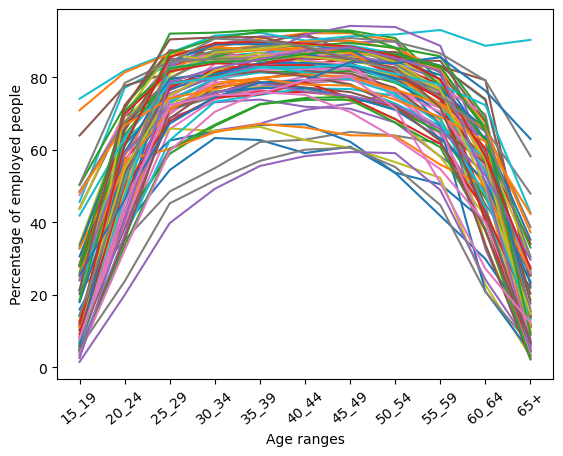

In [8]:
for key in my_dict.keys():
    if key != 'Saudi Arabia':
        plt.plot(my_dict[key])
plt.xlabel('Age ranges')
plt.ylabel('Percentage of employed people')
plt.xticks(ticks=[i for i in range(11)], labels=age_brackets, rotation=40)
plt.show()

In [9]:
transform = transforms.ToTensor()

In [10]:
for key in my_dict.keys():
    my_dict[key] = transform(my_dict[key].reshape(-1, 11))

In [11]:
del my_dict['Saudi Arabia']

In [12]:
names = [key for key in my_dict.keys()]

In [13]:
african_countries = [
    'Mauritius',
    'Gambia',
    'Tunisia',
    'South Africa',
    'Rwanda',
    'Burkina Faso',
    'Botswana'
]

In [14]:
new_names = [name for name in names if name not in african_countries]

In [15]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(1 * 11, 1 * 1)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(1 * 1, 1 * 11),
            nn.ReLU()
        )

    def encode(self, x):
        return self.encoder(x)

    def decode(self, y):
        return self.decoder(y)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [16]:
model = Autoencoder()
model.double()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-5)

In [17]:
'''num_epochs = 400
outputs = []
for epoch in range(num_epochs):
    loss_arr = []
    for name in names[:70]:
        img = my_dict[name]
        recon = model(img)
        loss = criterion(recon, img)
        loss_arr.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_avg = np.mean(loss_arr)

    loss_arr = []
    for name in names[70:]:
        img = my_dict[name]
        recon = model(img)
        loss = criterion(recon, img)
        loss_arr.append(loss.item())
    loss_test = np.mean(loss_arr)

    print(f'Epoch:{epoch+1}, Loss:{loss_test:.4f}')
    outputs.append([epoch, img, recon, loss_avg, loss_test])'''
model.load_state_dict(torch.load('models/model_for_employment_18_09.txt'))

/tmp/ipykernel_4005157/3627499420.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('models/model_for_employment_18_09.txt'))


<All keys matched successfully>

In [18]:
arr_afr = [model.encode(my_dict[name]).detach().numpy()[0][0][0] for name in african_countries]

In [19]:
arr_nonafr = [model.encode(my_dict[name]).detach().numpy()[0][0][0] for name in new_names]

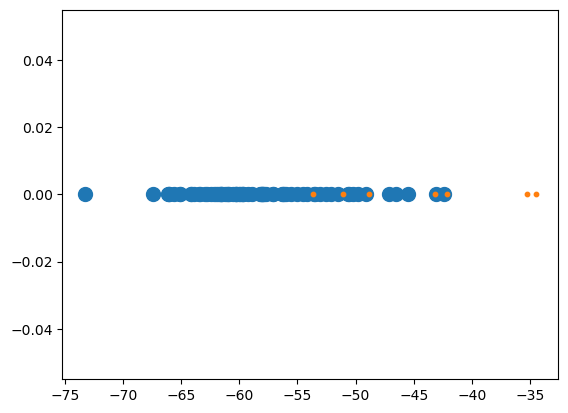

In [20]:
plt.scatter(arr_nonafr, [0 for element in arr_nonafr], s=100)
plt.scatter(arr_afr, [0 for element in arr_afr], s=10)

### Range for the sampling:

In [21]:
np.percentile(arr_nonafr, [5, 95])

array([-66.04365796, -46.83133368])

#### Check that the initial and obtained distributions are sinilar

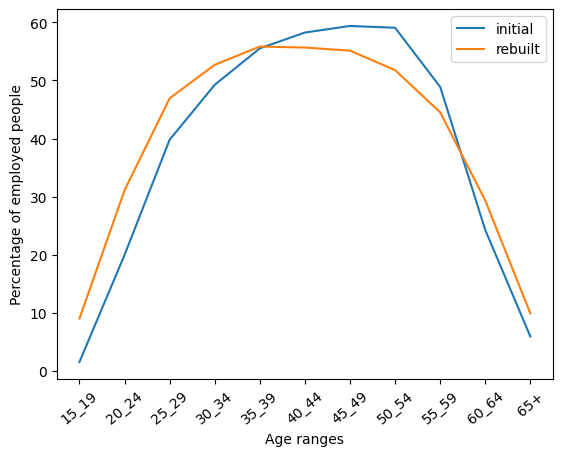

In [86]:
plt.plot(my_dict['South Africa'].detach().numpy()[0][0], label='initial')
plt.plot(model(my_dict['South Africa']).detach().numpy()[0][0], label='rebuilt')
plt.xlabel('Age ranges')
plt.ylabel('Percentage of employed people')
plt.xticks(ticks=[i for i in range(11)], labels=age_brackets, rotation=40)
plt.legend()
plt.show()